In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
img = cv2.imread("../opencv-np-workshop/data/img/regensburg.jpg")

In [5]:
rows, cols, _ = img.shape

In [6]:
noise = np.random.choice(255, (rows, cols, _))
noise = np.ndarray.astype(noise, np.uint8) # Coerce to 8-bit integer

In [8]:
noisy_img = cv2.addWeighted(img, 0.6, noise, 0.4, 0)

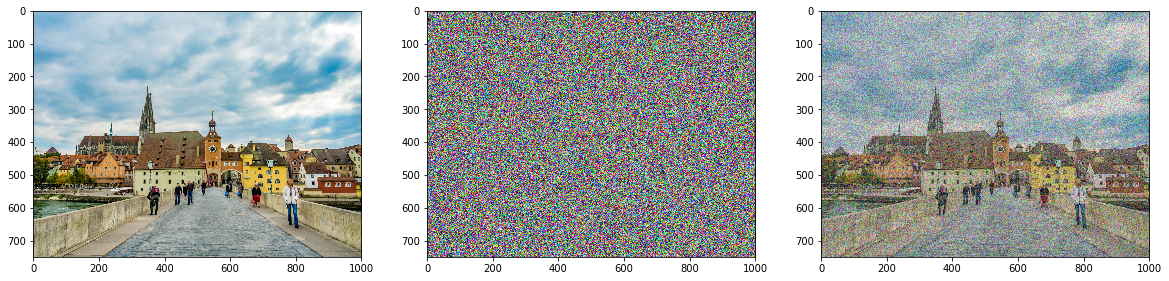

In [11]:
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(img[:,:,::-1])
plt.subplot(132)
plt.imshow(noise)
plt.subplot(133)
plt.imshow(noisy_img[:,:,::-1])

## Applying some custom kernel

In [12]:
kernel = np.ones((5,5), np.float32)/25

In [13]:
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

In [15]:
avg_filter = cv2.filter2D(noisy_img, -1, kernel) # -1 = ddepth

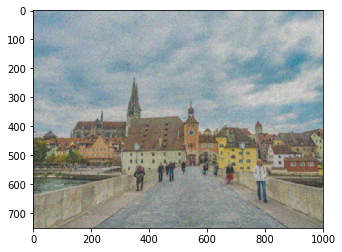

In [16]:
plt.imshow(avg_filter[:,:,::-1])

In [17]:
# Average filter
ksize = (5,5) # Need not be same size, but odd (ungerade)
avg_filter = cv2.blur(noisy_img, ksize)

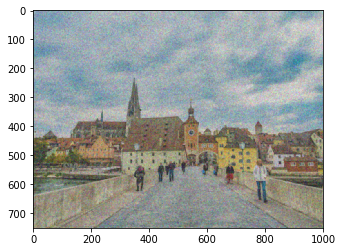

In [20]:
# Median as a "representative value"
med_filter = cv2.medianBlur(noisy_img, ksize=5) # Integer, needs to be symmetric kernel
plt.imshow(med_filter[:,:,::-1])

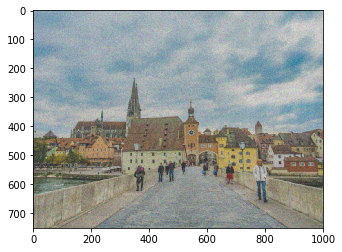

In [21]:
# Gaussian blur
gauss_filter = cv2.GaussianBlur(noisy_img, ksize, 0) # 0 to calculate a "local" std
plt.imshow(gauss_filter[:,:,::-1])

## Remove noisy adaptively + non-local

- Different regions of the image can have different levels of noise.
- Merge noise from similar regions from the image.

In [26]:
nl_filter = cv2.fastNlMeansDenoisingColored(noisy_img, 10, 10, 7, 21)

# First/second args = "Filter strength", higher is stronger
# Third argument = template window size (recommended 7)
# Fourth argument = search window size (recommended 21)

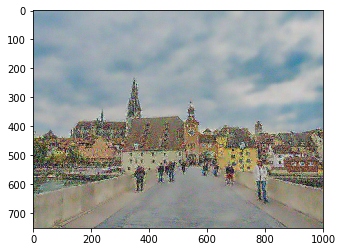

In [27]:
plt.imshow(nl_filter[:,:,::-1])